In [1]:
#imports

import os
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.callbacks import Callback


In [2]:
mnist = keras.datasets.mnist
(x_full, y_full), (x_test_full, y_test_full) = mnist.load_data()

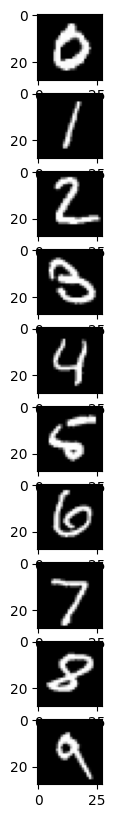

In [3]:
x_test_sample = []

for digit in range(10):
    for i in range(len(x_test_full)):
        if y_test_full[i] == digit:
            x_test_sample.append(x_test_full[i])
            break

plt.figure(figsize=(10, 10)) 
for i in range(10):
    plt.subplot(10,1,i+1)
    plt.imshow(x_test_sample[i], cmap='gray')


In [4]:
model_zero = models.load_model('Zero_model.h5')
model_one = models.load_model('One_model.h5')


In [5]:
for i in range(10):
    x_test_image = np.expand_dims(x_test_sample[i], axis=-1) # 28x28x1
    x_test_image = np.expand_dims(x_test_image, axis=0)   #1[batchsize]x28x28x1
   
    predictions_zero = model_zero.predict(x_test_image, verbose=0)
    predictions_one = model_one.predict(x_test_image, verbose=0)
    print(i,predictions_zero,predictions_one)

0 [[0.9164529]] [[1.4131681e-09]]
1 [[2.7813436e-05]] [[0.91587454]]
2 [[1.2292332e-07]] [[0.00193855]]
3 [[0.00015537]] [[2.470394e-10]]
4 [[2.2276882e-07]] [[1.5219141e-13]]
5 [[6.076382e-06]] [[2.0419448e-09]]
6 [[0.00115174]] [[1.4122672e-10]]
7 [[1.2362841e-08]] [[1.6799598e-08]]
8 [[4.946963e-07]] [[1.8634357e-14]]
9 [[1.347275e-08]] [[1.0029302e-07]]


In [6]:
weights_0 = model_zero.get_weights()  

file_path = './ZeroModelWeightsTraining/AfterEpoch10/Layer_0.npz'
data = np.load(file_path)
data_keys = data.files
weights_zero = data['arr_0']
print(weights_zero)
assert np.array_equal(weights_0[0], weights_zero),"not same weights"
"same weights"


[[[[ 0.56366223]]

  [[ 0.4106247 ]]

  [[-0.37495703]]]


 [[[-0.37997198]]

  [[-0.31581804]]

  [[ 0.09704345]]]


 [[[ 0.09009541]]

  [[ 0.6806382 ]]

  [[ 0.23851132]]]]


'same weights'

In [7]:
weights_1 = model_one.get_weights()  
file_path = './OneModelWeightsTraining/AfterEpoch10/Layer_0.npz'
data = np.load(file_path)
data_keys = data.files
weights_one = data['arr_0']
print(weights_one)
assert np.array_equal(weights_1[0], weights_one),"not same weights"
"same weights"


[[[[ 0.5102899 ]]

  [[ 0.29709798]]

  [[-0.53249454]]]


 [[[-0.4979646 ]]

  [[-0.48687875]]

  [[-0.04603991]]]


 [[[-0.00680243]]

  [[ 0.59408337]]

  [[ 0.13007963]]]]


'same weights'

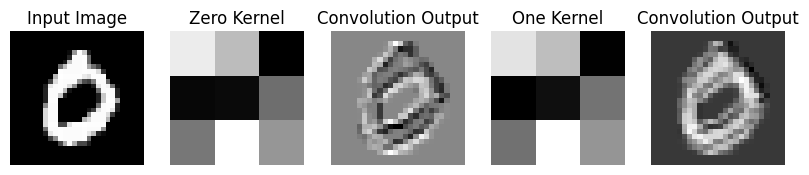

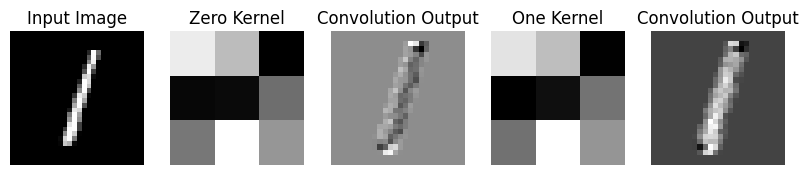

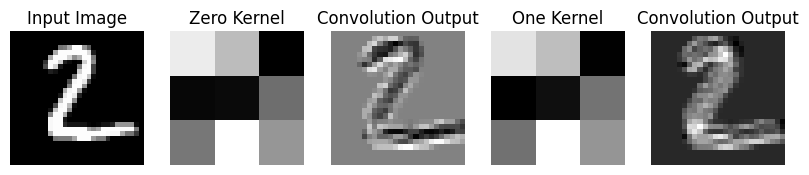

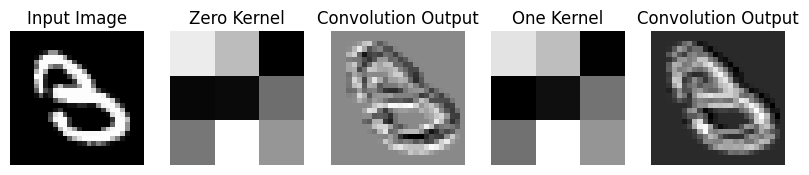

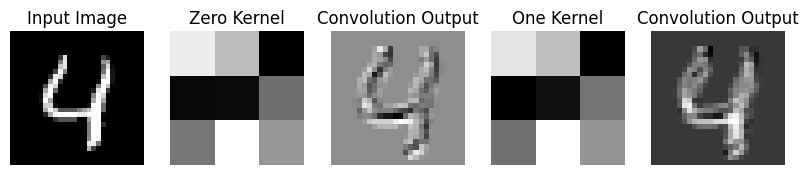

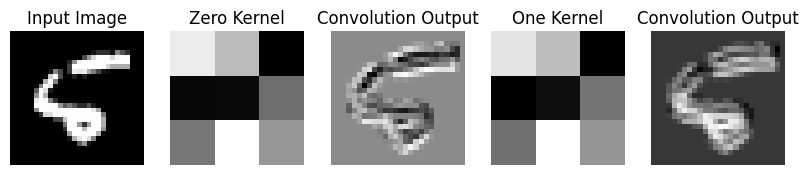

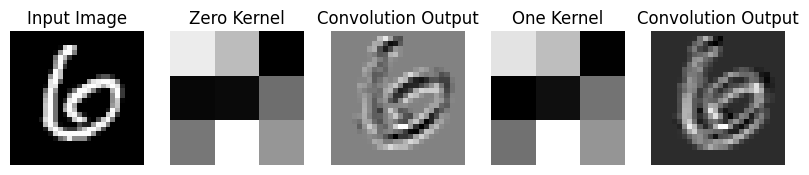

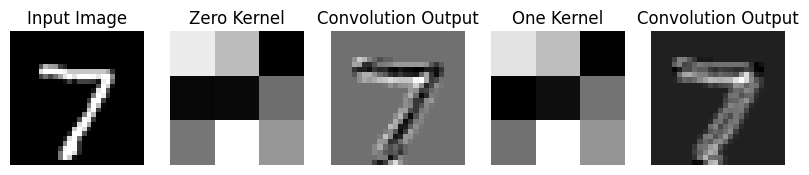

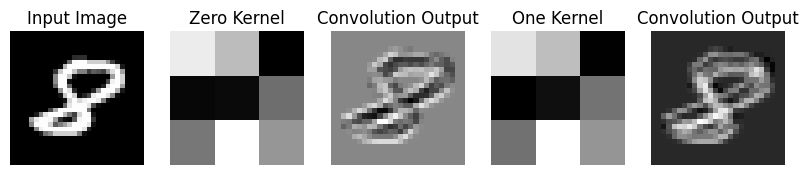

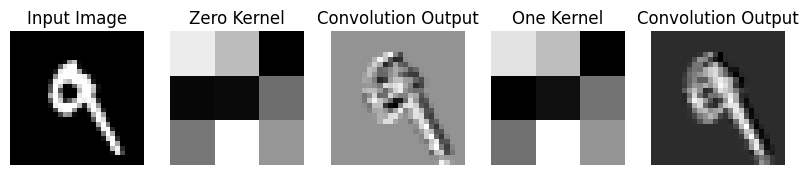

In [8]:
kernel_0=weights_one.reshape(3,3)
kernel_1=weights_zero.reshape(3,3)

for i in range(10):
    image = x_test_sample[i]
    output_0 = convolve2d(image, kernel_0, mode='valid')
    output_1 = convolve2d(image, kernel_1, mode='valid')

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 5, 1)
    plt.title("Input Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 5, 2)
    plt.title("Zero Kernel")
    plt.imshow(kernel_0, cmap='gray')
    plt.axis('off')
    plt.subplot(1, 5, 3)
    plt.title("Convolution Output")
    plt.imshow(output_0, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 5, 4)
    plt.title("One Kernel")
    plt.imshow(kernel_1, cmap='gray')
    plt.axis('off')
    plt.subplot(1, 5, 5)
    plt.title("Convolution Output")
    plt.imshow(output_1, cmap='gray')
    plt.axis('off')
    plt.show()


In [9]:
from tensorflow.keras.models import Model
# Create a new model that outputs logits (the raw outputs before activation)
logit_model_zero = Model(inputs=model_zero.input, outputs=model_zero.output)
logit_model_one = Model(inputs=model_one.input, outputs=model_one.output)

# Prepare test images
# Ensure x_test_sample is correctly defined and shaped
for i in range(10):
    x_test_image = np.expand_dims(x_test_sample[i], axis=-1)  # Add channel dimension if required
    x_test_image = np.expand_dims(x_test_image, axis=0)  # Add batch dimension
    
    # Get logits (before activation) for each model
    logits_zero = logit_model_zero.predict(x_test_image, verbose=0)
    logits_one = logit_model_one.predict(x_test_image, verbose=0)
    
    print(f"Logits for image {i}:")
    print(f"Before activation (model_zero): {logits_zero}")
    print(f"Before activation (model_one): {logits_one}")


ValueError: The layer sequential_1 has never been called and thus has no defined input.

In [15]:
from tensorflow.keras.models import load_model, Model

# Load the trained models
model_zero = load_model('Zero_model.h5')
model_one = load_model('One_model.h5')

# Check if models are instances of Sequential
if hasattr(model_zero, 'input') and hasattr(model_zero, 'output'):
    logit_model_zero = Model(inputs=model_zero.input, outputs=model_zero.output)
else:
    raise ValueError("Model zero does not have defined inputs and outputs")

if hasattr(model_one, 'input') and hasattr(model_one, 'output'):
    logit_model_one = Model(inputs=model_one.input, outputs=model_one.output)
else:
    raise ValueError("Model one does not have defined inputs and outputs")


ValueError: The layer sequential has never been called and thus has no defined input.

In [16]:
print("Model Zero Inputs:")
print(model_zero.input)
print("\nModel Zero Outputs:")
print(model_zero.output)

print("\nModel One Inputs:")
print(model_one.input)
print("\nModel One Outputs:")
print(model_one.output)


Model Zero Inputs:


ValueError: The layer sequential has never been called and thus has no defined input.

In [18]:
try:    
    print("Model Zero Inputs:")    
    print(model_zero.input)    
    print("\nModel Zero Outputs:")    
    print(model_zero.output)
except Exception as e:    
    print(f"Error accessing Model Zero inputs/outputs: {e}")
    
try:    
    print("\nModel One Inputs:")    
    print(model_one.input)    
    print("\nModel One Outputs:")    
    print(model_one.output)
except Exception as e:    
    print(f"Error accessing Model One inputs/outputs: {e}")

Model Zero Inputs:
Error accessing Model Zero inputs/outputs: The layer sequential has never been called and thus has no defined input.

Model One Inputs:
Error accessing Model One inputs/outputs: The layer sequential has never been called and thus has no defined input.
